In [1]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.animation

In [33]:
width = 100
height = 100
initProb = 0.2

In [17]:
def initialize():
    global time, config, nextConfig

    time = 0
    
    config = zeros([height, width])
    for x in range(width):
        for y in range(height):
            if random.random() < initProb:
                state = 1
            else:
                state = 0
            config[y, x] = state

    nextConfig = zeros([height, width])

def observe():
    plt.cla()
    fig,ax=plt.subplots()
    ax.imshow(config, vmin = 0, vmax = 1, cmap = 'binary')
    plt.axis('image')
    plt.title('t = ' + str(time))
    plt.show()

def update():
    global time, config, nextConfig

    time += 1

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            numberOfAlive = 0
            for dx in range(-1, 2):
                for dy in range(-1, 2):
                    numberOfAlive += config[(y+dy)%height, (x+dx)%width]
            if state == 0 and numberOfAlive == 3:
                state = 1
            elif state == 1 and (numberOfAlive < 3 or numberOfAlive > 4):
                state = 0
            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config


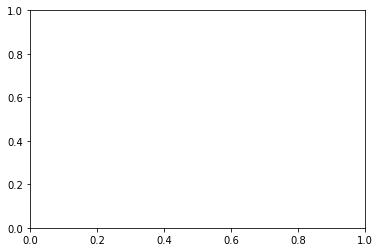

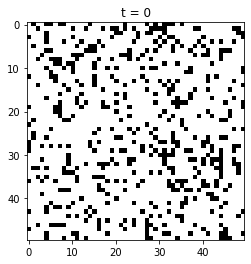

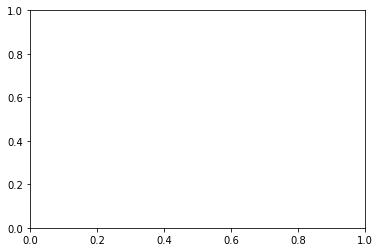

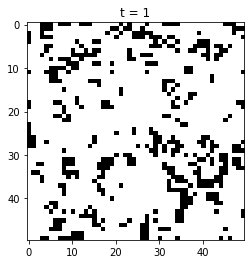

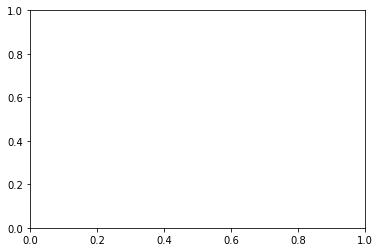

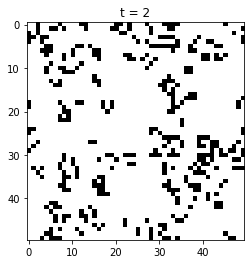

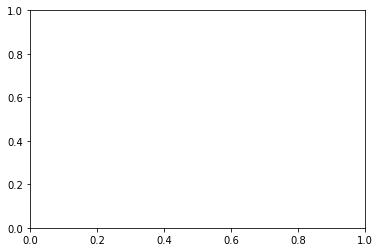

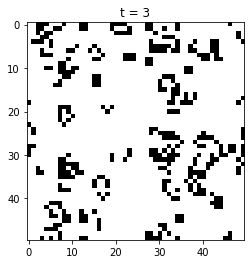

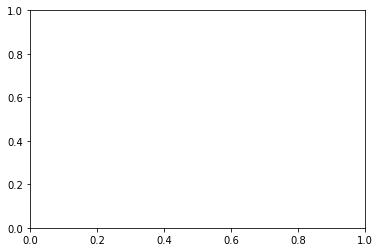

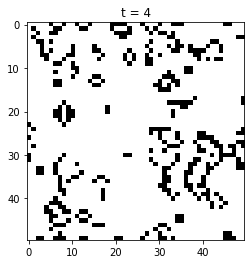

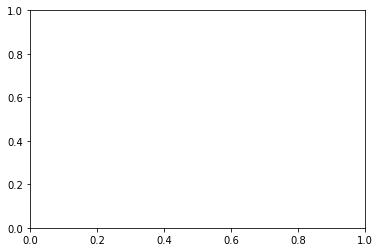

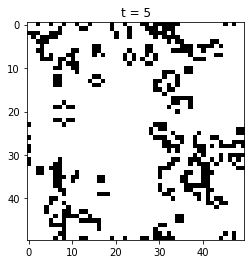

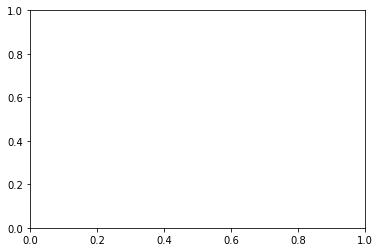

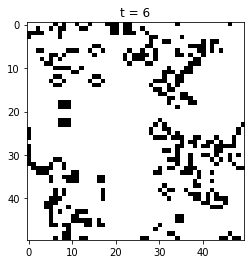

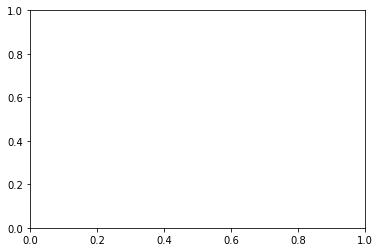

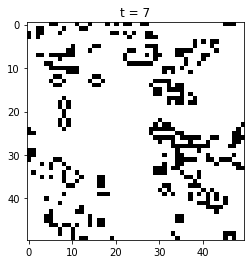

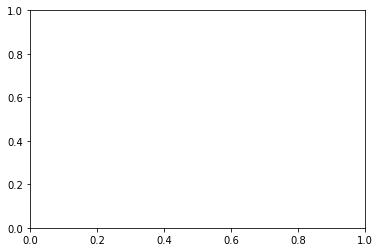

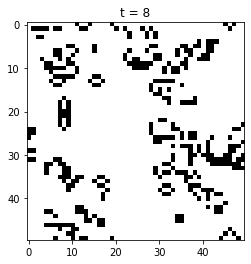

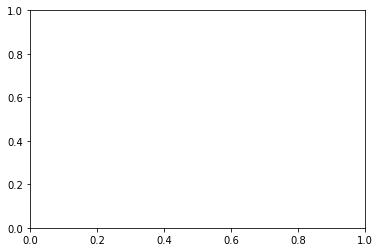

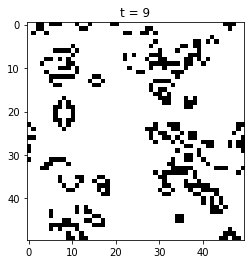

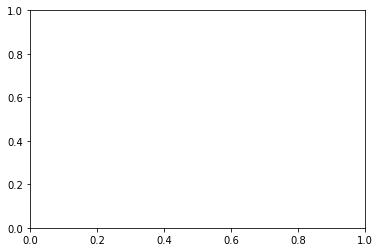

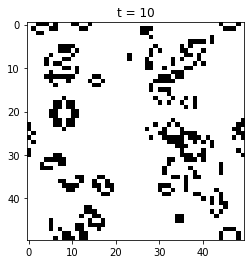

In [18]:
initialize()
observe()
for i in range(10):
    update()
    observe()

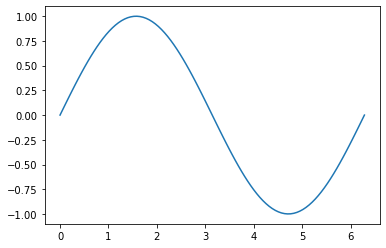

In [19]:
x = linspace(0, 2*pi, 100)
y = sin(x)
plt.plot(x, y)
plt.show()

In [20]:
%matplotlib notebook


<IPython.core.display.Javascript object>


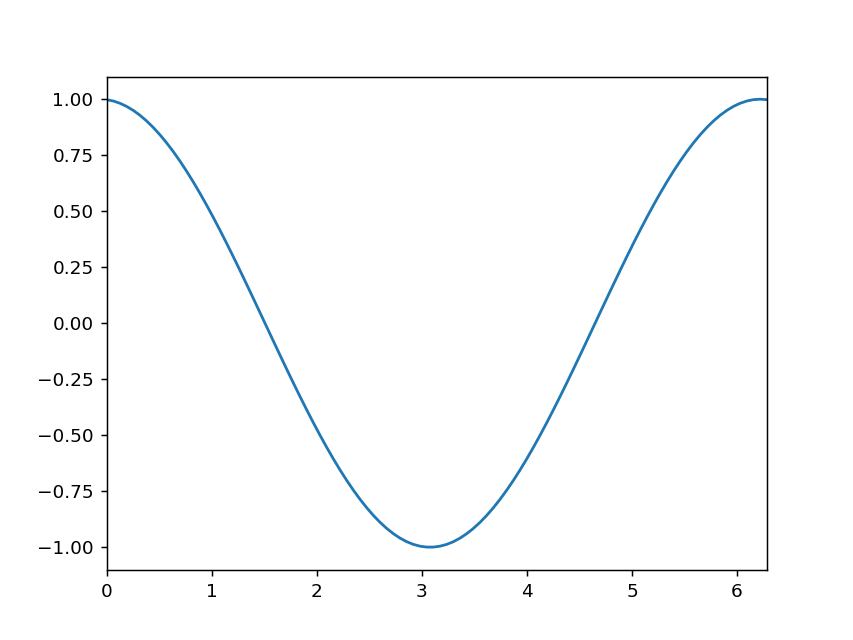

In [25]:
fig, ax = plt.subplots()

line, = ax.plot([])

ax.set_xlim(0, 2*pi)
ax.set_ylim(-1.1, 1.1)

def animate(frame_num):
    y = sin(x + 2*pi * frame_num/100)
    line.set_data((x, y))
    return line
anim = matplotlib.animation.FuncAnimation(fig, animate, frames=100, interval=5)

<IPython.core.display.Javascript object>


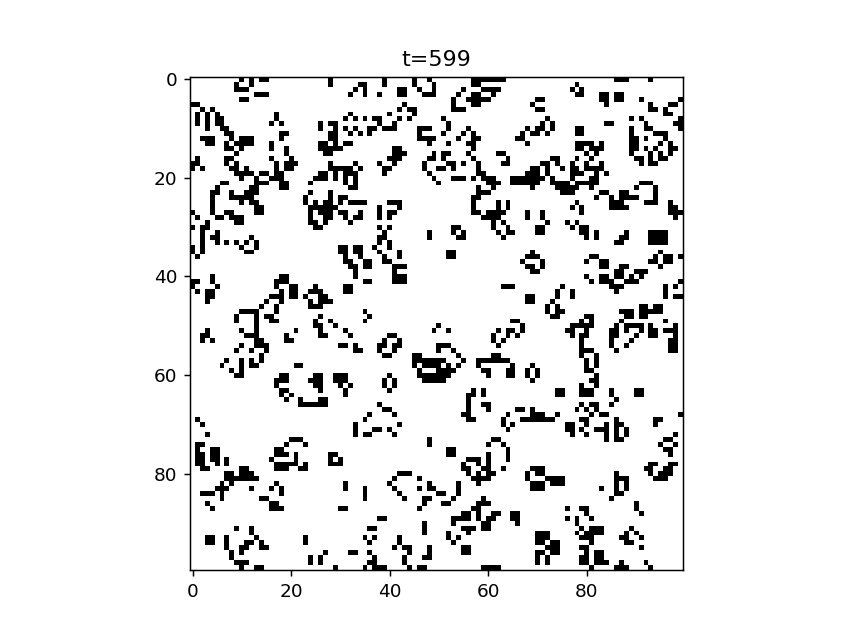

In [34]:
%matplotlib notebook
initialize()
ims=[]
fig,ax=plt.subplots()
for i in range(600):
    im=ax.imshow(config,vmin=0, vmax=1, cmap='binary',animated=True)
    plt.title('t='+ str(i))
    plt.show()
    if i==0:
        ax.imshow(config,vmin=0, vmax=1, cmap='binary',animated=True)
    ims.append([im])
    update()
    
    
ani=matplotlib.animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
